# Синицин Дмитрий, БКЛ181, ДЗ 2.2

In [1]:
!pip install pycodestyle flake8 pycodestyle_magic
%load_ext pycodestyle_magic
%pycodestyle_on

### Установим тут все-все необходимое для выполнения дз

In [2]:
! pip install wordcloud

! pip install nltk

import nltk
from nltk.tokenize import word_tokenize
from pymorphy2 import MorphAnalyzer
import pandas as pd
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from nltk.corpus import webtext
from nltk.probability import FreqDist
import seaborn as sns

### Прочитаем текст. Снова

In [3]:
text = open('nabokov.txt', 'r', encoding='utf-8')
text_str = text.read()

### Проанализируем полученный текст, заодно и протекенизируем его для одного из заданий, а еще и сохраним. Тоже снова.

In [10]:
tokens = [w.lower() for w in word_tokenize(text_str) if w.isalpha()]
m = MorphAnalyzer()
mass = []
for i in tokens:
    first = m.parse(i)[0]
    mass.append(first)
lemmas = []
for i in mass:
    lemma = (i.word, (i.normal_form, i.tag.POS))
    lemmas.append(lemma)

list_of_lemmas = [lemma[1][0] for lemma in lemmas]

dataframe = pd.DataFrame(table)
dataframe.to_csv('chto.csv', sep='\t', index=False)

### Начинаем датафреймить. Сразу выведем результат

In [11]:
def parse(x):
    n = {'POS' : x.tag.POS, 'case' : x.tag.case , 'number' : x.tag.number,
         'gender' : x.tag.gender, 'animacy' : x.tag.animacy , 'aspect' : x.tag.aspect, 
         'transitivity' : x.tag.transitivity, 'person' : x.tag.person, 
         'tense' : x.tag.tense, 'mood' : x.tag.mood, 'involvement' : x.tag.involvement, 
         'voice' : x.tag.voice,'lemm' : x.normal_form, 'word' : x[0]}
    return n
mass1 = []
for i in mass:
    mass1.append(parse(i))
    
table = pd.read_csv('info.csv', sep='\t').fillna('')
table.head(20)

,POS,animacy,aspect,case,gender,involvement,lemm,mood,person,tense,transitivity,voice,word,число
0,NOUN,inan,,nomn,neut,,дерево,,,,,,дерево,sing
1,NOUN,inan,,nomn,femn,,роза,,,,,,роза,sing
2,NOUN,inan,,nomn,masc,,цветок,,,,,,цветок,sing
3,NOUN,anim,,nomn,masc,,олень,,,,,,олень,sing
4,ADJF,,,nomn,neut,,животный,,,,,,животное,sing
5,NOUN,anim,,nomn,masc,,воробей,,,,,,воробей,sing
6,NOUN,anim,,nomn,femn,,птица,,,,,,птица,sing
7,NOUN,inan,,nomn,femn,,россия,,,,,,россия,sing
8,ADJF,,,nomn,neut,,наш,,,,,,наше,sing
9,NOUN,inan,,accs,neut,,отечество,,,,,,отечество,sing


ValueError: too many values to unpack (expected 3)

### Оформим по красоте облако из самых частотных слов

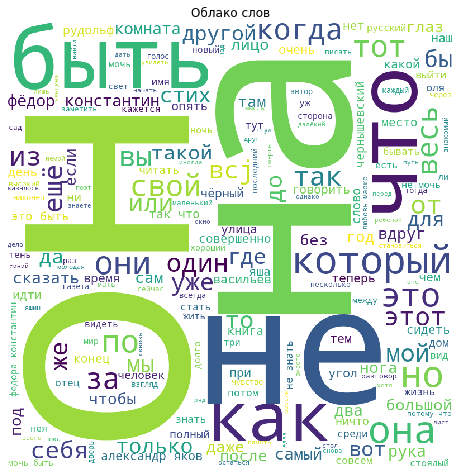

In [12]:
text_str = ' '.join([word for word in table['lemm'].values])
wordcloud = WordCloud(
    background_color='white',
    width=800,
    height=800,
).generate(text_str)
plt.figure(figsize=(8, 10), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Облако слов')
plt.show()

##### Вышло очень некрасиво, потому что я не чистил от стоп-слов, но менять я конечно же ничего не буду


### Продемонстрируем длинну слов на графике DataFrame


Text(0.5, 0, 'Длинна слов')

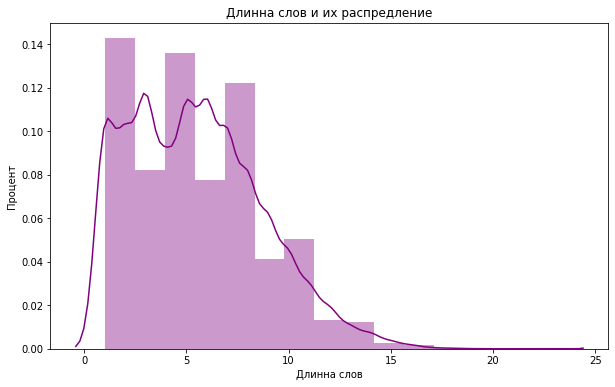

In [13]:
dataframe['length'] = dataframe['word'].apply(len)
plt.figure(figsize=(10, 6))
sns.distplot(dataframe['length'], bins=15, color='purple')
plt.title('Длинна слов и их распредление')
plt.ylabel('Процент')
plt.xlabel('Длинна слов')